<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/deeplearning_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
print(os.getcwd())

import tensorflow as tf
import numpy as np
import pandas as pd
import os 

import matplotlib.pyplot as plt 
from PIL import Image

img = Image.open('Downloads/archive/flowers/daisy/5547758_eea9edfd54_n.jpg')
print("img : \n", img)

plt.imshow(img)
#plt.draw()
plt.show()

img_array = np.array(img)
print("img_array.shape : \n", img_array.shape)
print("img_array : \n", img_array)

resized = img.resize([100,100])

print("resized : ", resized)
plt.imshow(resized)
plt.show()

resized_array = np.array(resized)
print("resized_array.shape : ", resized_array.shape)

path = 'Downloads/archive/flowers/'
filename = os.listdir(path)
print("filenames:", filename)

def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

target_names = list_dir(path=path)
print("target_names:",target_names)

for dx,dname in enumerate(target_names):
    print("dname:",dname)
    
    # 종속변수까지의 경로
    subpath = path + dname
    print("subpath:",subpath)
    
    filenames = list_dir(path = subpath)
    print('filenames :',filenames)

imagepath = os.path.join(subpath,filenames[2])
print("imagepath :",imagepath)

img = Image.open(imagepath)
img

resize = img.resize([100,100])
resize_np_array = np.array(resize)
print("resize_np_array \n",resize_np_array.shape)

def load_image_pixels(imagepath,resolution):
    img = Image.open(imagepath)
    img_resize = img.resize(resolution)
    
    return np.array(img_resize)

resolution = [100,100]
pixels = load_image_pixels(imagepath = imagepath, resolution = resolution)

print("pixels \n",pixels)

resolution = [100,100]

def flowers_init(resolution):
    path = 'Downloads/archive/flowers/'
    target_naems = list_dir(path)
    
    images =[]
    idxs = []
    
    for dx,dname in enumerate(target_names):
        print('dname :',dname)
        
        subpath = path + dname
        print('subpath :',subpath)
        
        filenames = list_dir(subpath)
        print('filenames : ',filenames[:3])
        
        for fname in filenames:
            
            if fname[-4:] != '.jpg':
                continue
            
            imagepath = os.path.join(subpath,fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            
            idxs.append(dx)
            
    xs = np.array(images,dtype=np.float32)
    
    return xs, images,idxs

xs, images, idxs = flowers_init(resolution = resolution)



In [ ]:
print(idxs)
print(xs.shape)
print(xs[0].shape)

In [ ]:
pd.DataFrame(idxs).value_counts()

In [ ]:
img = xs[11]
# plt.imshow(img)

img_image = Image.fromarray(np.uint8(img))
plt.imshow(img_image)
plt.show()

In [ ]:
img

In [ ]:
np.uint8(img)

In [ ]:
plt.figure(figsize=(15,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    i   = np.random.choice(4317)
    img = xs[i]
    img_image = Image.fromarray(np.uint8(img))
    plt.axis('off')
    plt.imshow(img_image)
    
plt.show()

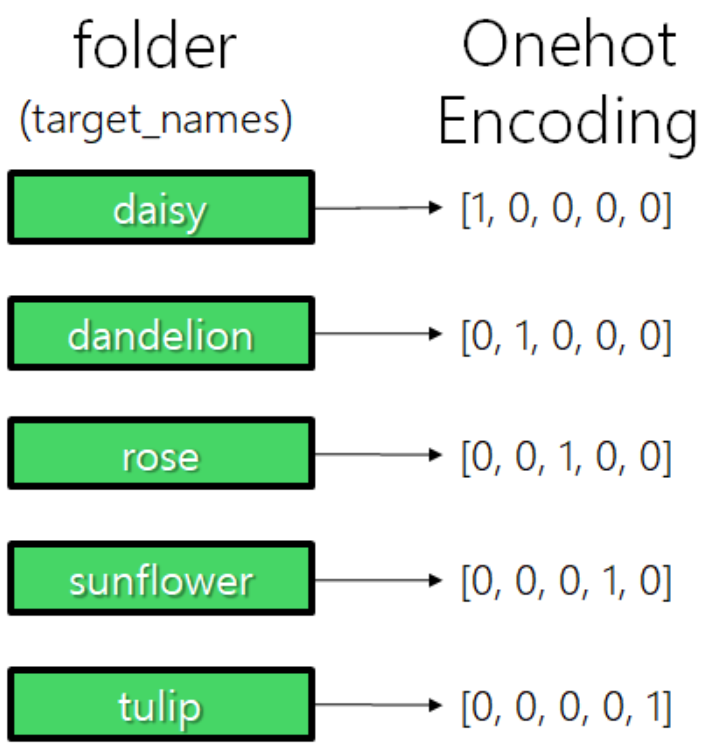

In [ ]:
cnt = 5
np.eye(cnt)

In [ ]:
print(np.eye(cnt)[0])
print(np.eye(cnt)[3])
print(np.eye(cnt)[2])
print(np.eye(cnt)[15])

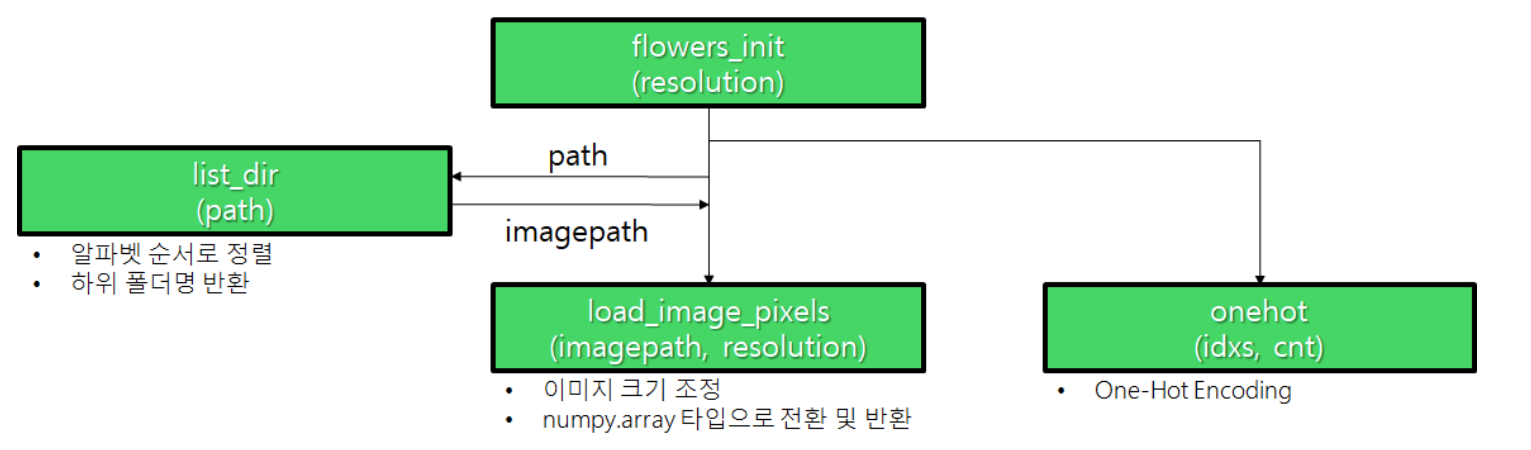

In [ ]:
def onehot(idxs, cnt):
    return np.eye(cnt)[idxs]

In [ ]:
cnt = len(target_names)

In [ ]:
ys = onehot(idxs=idxs, cnt = cnt)
print(ys[0])
print(ys[1])
print(ys[2])
print(ys[3])
print(ys[4])

In [ ]:
def flowers_init(resolution):
    path = 'dataset/flowers/'
    target_names = list_dir(path)
    
    images,idxs = [], []
    
    for dx, dname in enumerate(target_names):
        print('dname : ', dname)

        subpath = path + dname
        print("subpath : ", subpath)

        filepath = list_dir(subpath)
        print("filepath : ", filepath[:3])
        
        for fname in filepath:
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath, fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            idxs.append(dx)
            
    xs = np.asarray(images, dtype=np.float32)
    
    ys = onehot(idxs=idxs, cnt = len(target_names))
    
    return xs, ys

In [ ]:
xs, ys = flowers_init(resolution = [100,100])

In [ ]:
print("xs.shape : ", xs.shape)
print("ys.shape : ", ys.shape)

In [ ]:
plt.figure(figsize=(12,12))

for i in range(16):
    plt.subplot(4,4,i+1)
    i   = np.random.choice(4317)
    img = xs[i]
    img_image = Image.fromarray(np.uint8(img))
    
    plt.title("test_y_onehot :\n{}".format(ys[i]))
    
    plt.axis('off')
    plt.imshow(img_image)
    
plt.show()

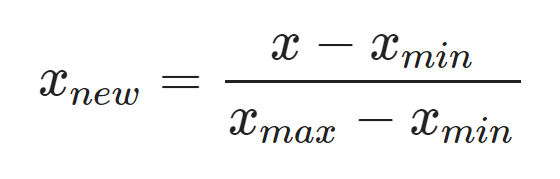

In [ ]:
print("xs.max() : ", xs.max())
print("xs.min() : ", xs.min())

In [ ]:
xs_norm = xs / 255.0
print("xs_norm.max() : ", xs_norm.max())
print("xs_norm.min() : ", xs_norm.min())

In [ ]:
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)
print(len(shuffle_map))
print("shuffle_map : \n ",shuffle_map)


In [ ]:
train_ratio = 0.8

test_begin_index = int(xs_norm.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

In [ ]:
train_x = xs[shuffle_map[:test_begin_index]]
test_x  = xs[shuffle_map[test_begin_index:]]

train_y = ys[shuffle_map[:test_begin_index]]
test_y  = ys[shuffle_map[test_begin_index:]]

In [ ]:
print("train_x.shape : ", train_x.shape)
print("train_y.shape : ", train_y.shape)
print("test_x.shape : ", test_x.shape)
print("test_y.shape : ", test_y.shape)

In [ ]:
plt.figure(figsize=(12,12))

for i in range(36):
    plt.subplot(6,6,i+1)
    i   = np.random.choice(3453)
    img = train_x[i]
    img_image = Image.fromarray(np.uint8(img))
    
    plt.title("test_y_onehot :\n{}".format(train_y[i]))
    
    plt.axis('off')
    plt.imshow(img_image)
    
plt.show()

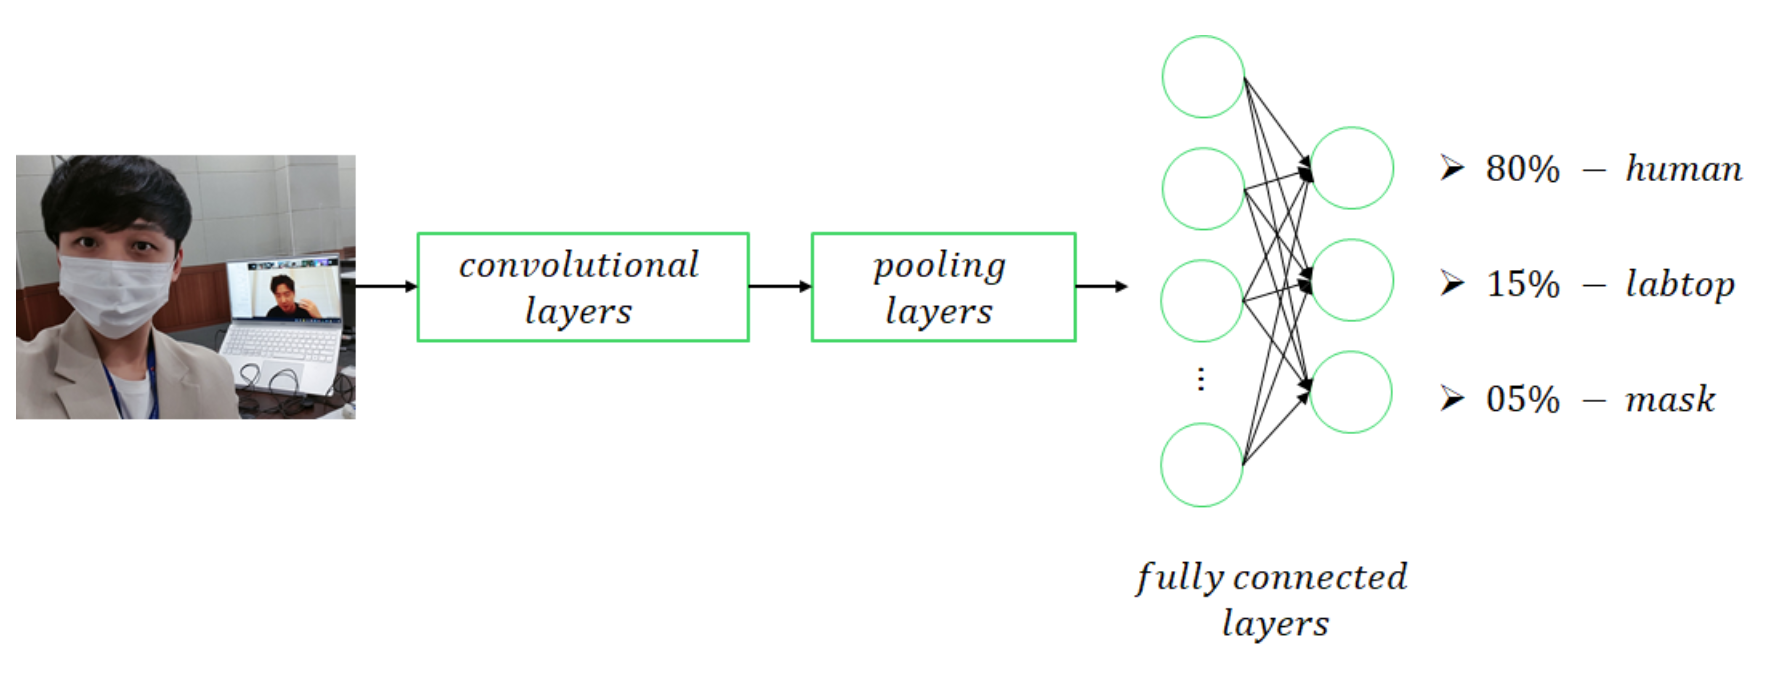

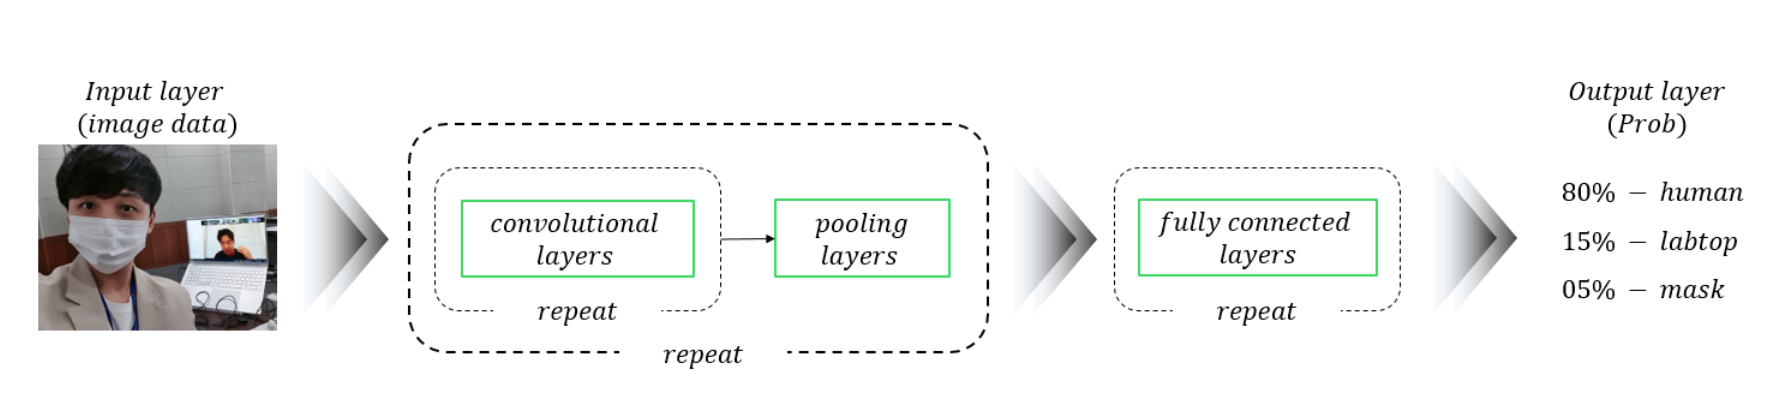

In [ ]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),
    filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])


In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 565504)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               72384640  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 72,408,869
Trainable params: 72,408,869
Non-trainable params: 0
____________________________________________

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 56448)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

# VGGNet

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters = 32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(100,100,32),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 128, padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
               loss       = 'categorical_crossentropy',
               metrics    = [tf.keras.metrics.TruePositives(name = 'True_positives'),
                            tf.keras.metrics.FalsePositives(name = 'False_positives')])

In [ ]:
history = model_1.fit(train_x, train_y,
                     epochs           = 50,
                     validation_split = 0.2,
                     batch_size       = 32)

In [ ]:
model_1.save('flowers_model_1.h5')

In [ ]:
# 제가 드린 모델 파일로 진행하는 경우 ▼
model_1 = tf.keras.models.load_model('save_model/flowers_model_1.h5')

In [ ]:
model_1.evaluate(test_x, test_y)

In [ ]:
pred_y = model_1.predict(test_x)

In [ ]:
print(np.round(pred_y, 3))

In [ ]:
# 테스트 데이터 12번째 
test_index = 17
# 예측 값 중에서 가장큰 인덱스를 출력 (예측 값)
print("pred_y_{} -> {}".format(test_index, np.argmax(pred_y[test_index])))
# 테스트 데이터의 확률분포 중 가장 큰 값을 출력(실제 값) 
print("test_y_{} -> {}".format(test_index, np.argmax(test_y[test_index])))
print("Prob : ",np.round(pred_y[test_index],3))

img = test_x[test_index]
img_image = Image.fromarray(np.uint8(img))
plt.imshow(img_image)
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

for i in range(16):
    
    plt.subplot(4,4,i+1)
    
    i = np.random.choice(864)
    img = test_x[i]
    img_Image = Image.fromarray(np.uint8(img))
    plt.imshow(img_Image)
    
    plt.title('pred_y : {} , test_y : {} \nProb : {}'.format(np.argmax(pred_y[i]), np.argmax(test_y[i]), np.round(pred_y[i],3)))
    plt.axis('off')

plt.draw()

#plt.show()

# 퀘스트 
## 여러분들의 사진 혹은 (여자친구 혹은 남자친구) 혹은 가족 등의 사진을 바탕으로 
## 어떠한 꽃과 닮았는지 예측해 주는 프로그램을 작성해 주세요. 

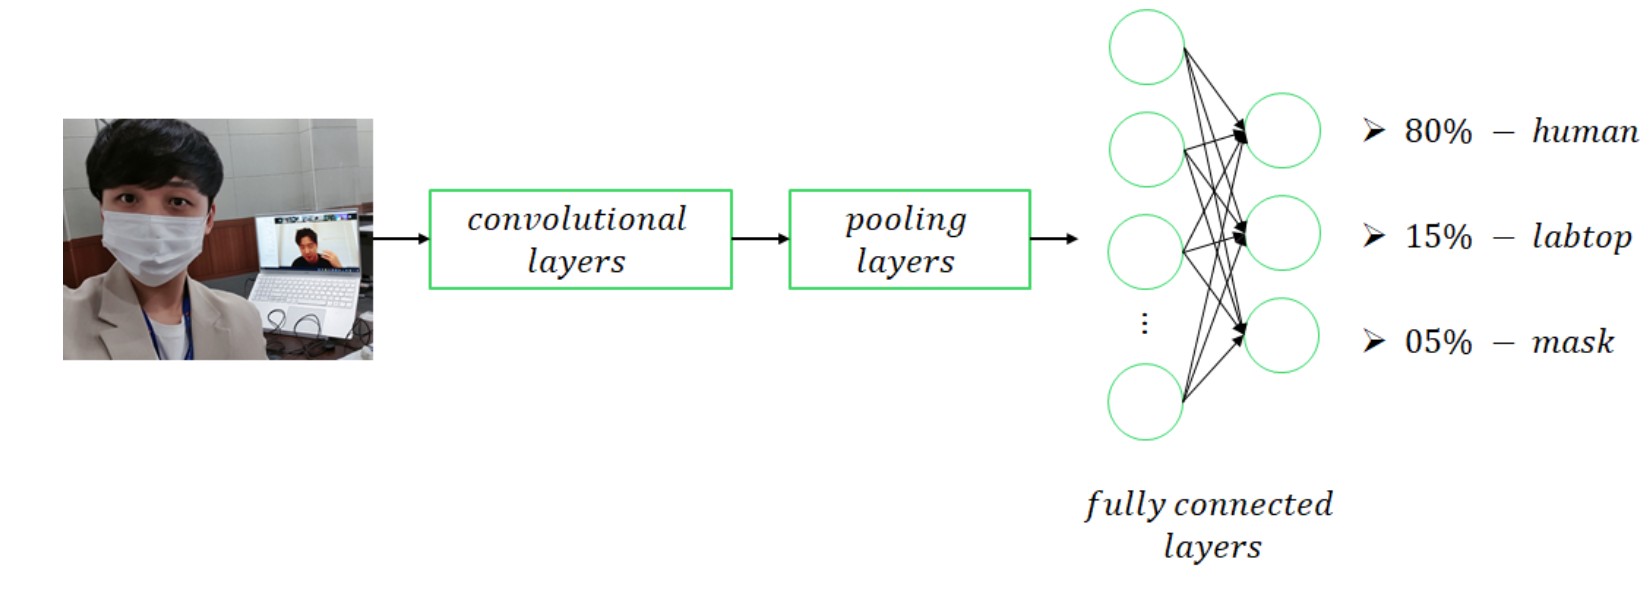

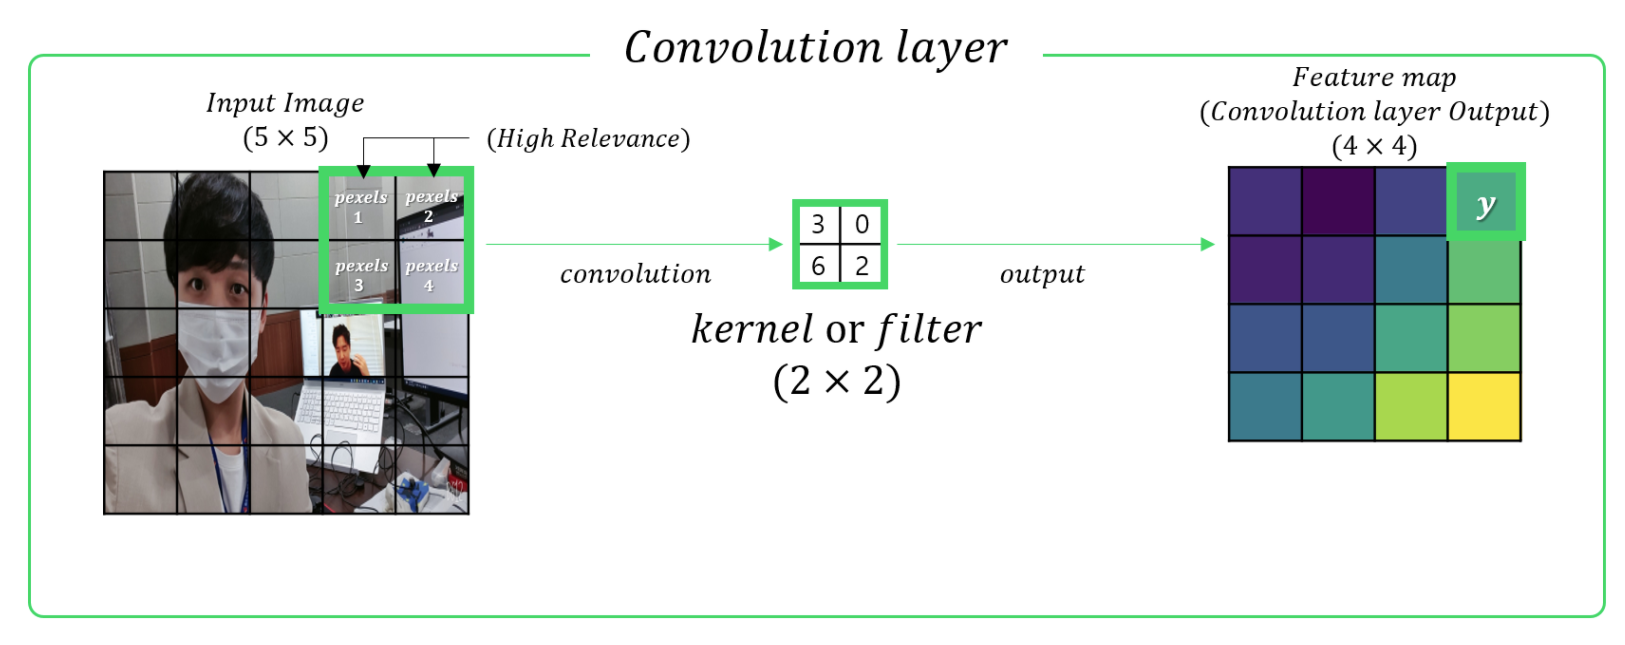

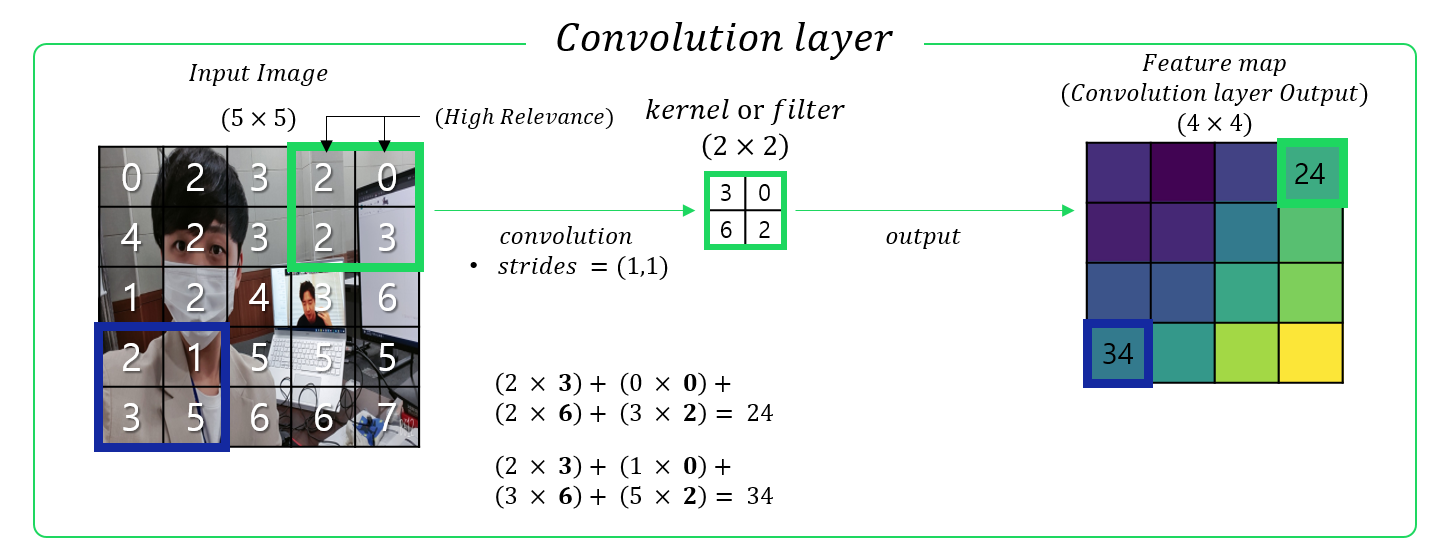

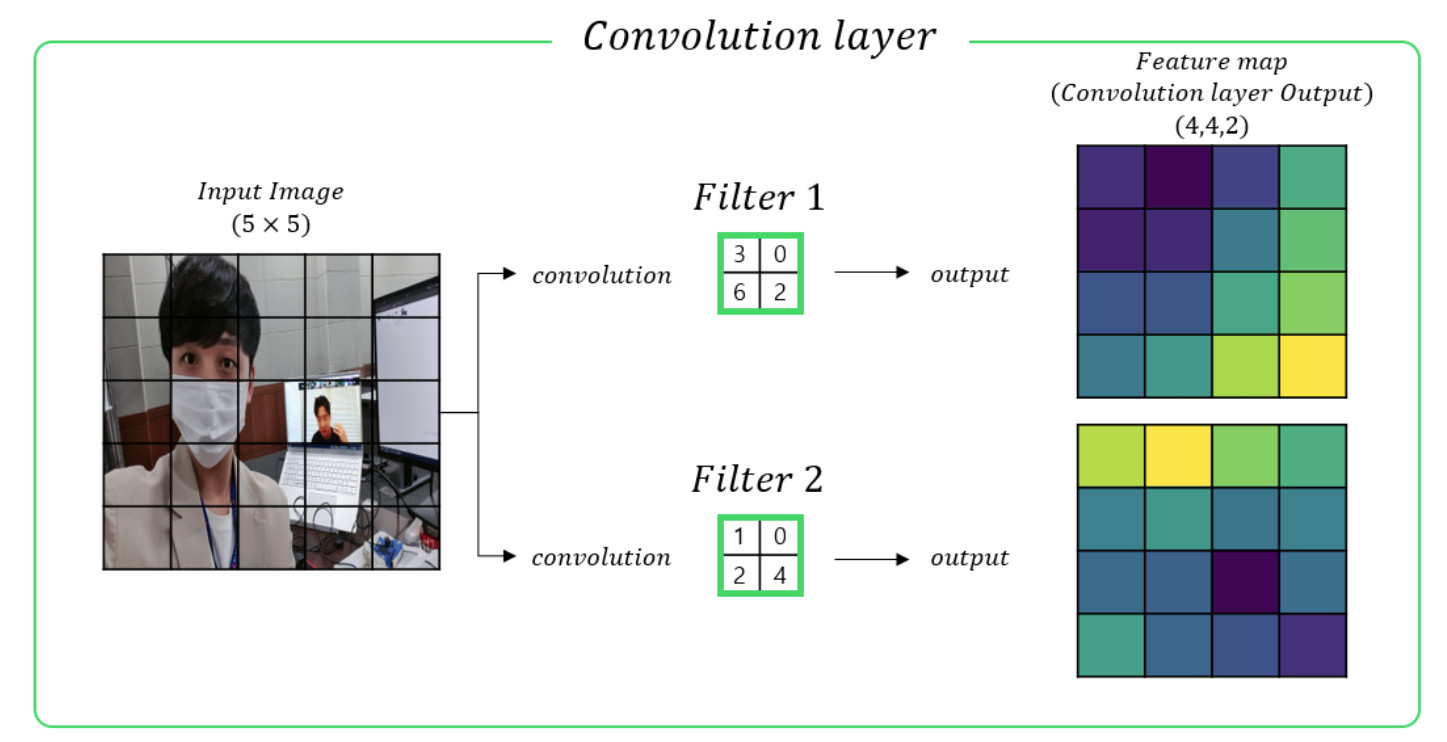

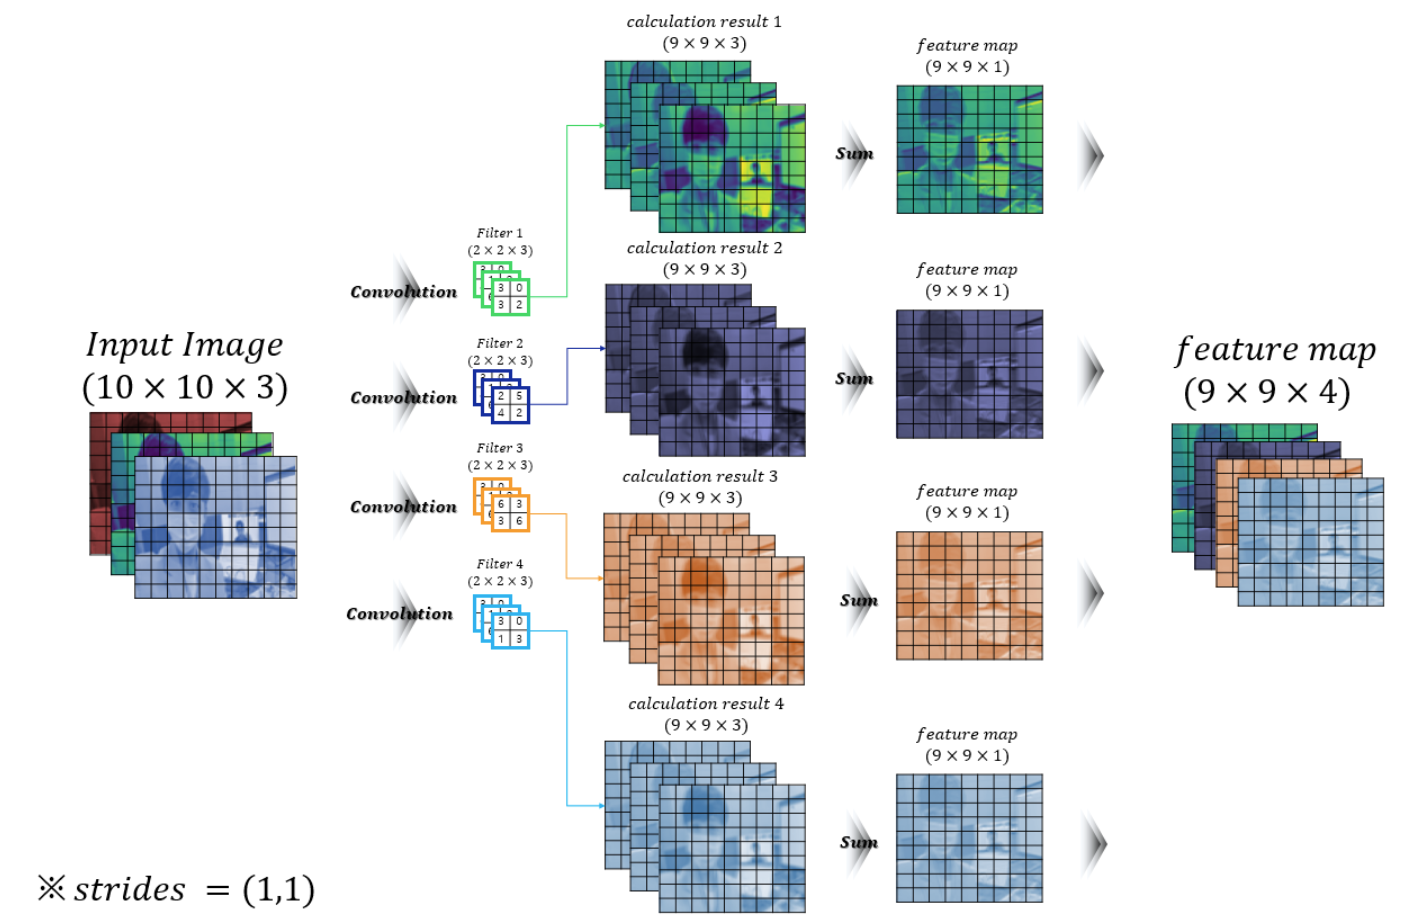

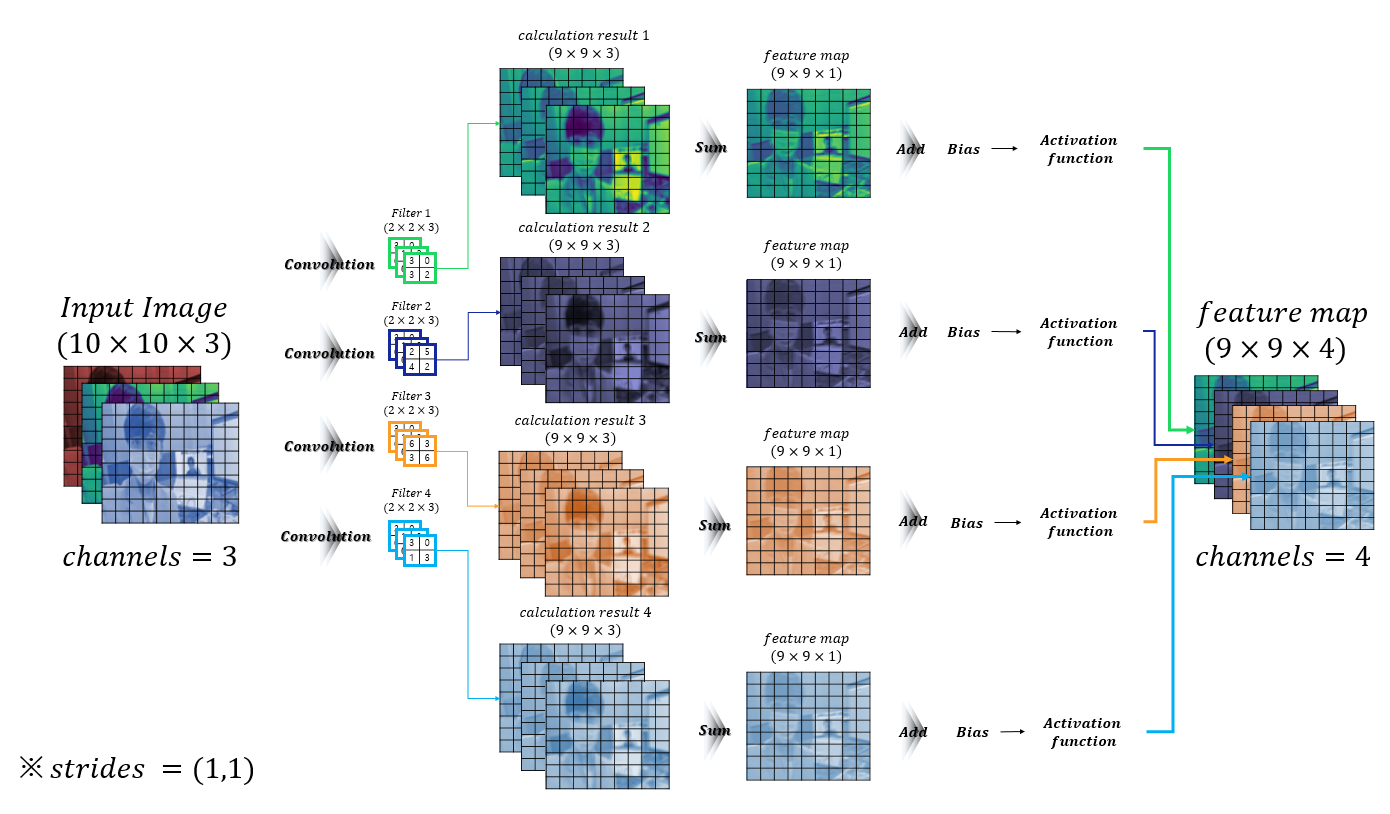

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [ ]:
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/광인사_1기/2rl/dataset/flowers_model_1.h5')

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 56448)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
# 첫 번째 계층(합성곱)
ins  = model_1.inputs
outs = model_1.layers[0].output

In [ ]:
# 두 번째 계층(풀링)
ins  = model_1.inputs
outs = model_1.layers[1].output

In [ ]:
# 네 번째 계층(합성곱, 마지막 합성곱)
ins  = model_1.inputs
outs = model_1.layers[4].output

In [ ]:
feature_map = Model(inputs = ins, outputs = outs)
feature_map.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_______________________________________________________

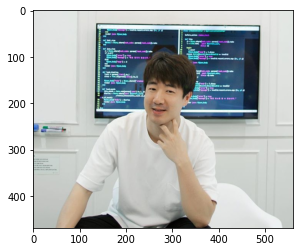

In [ ]:
img = Image.open('/content/test.jpg')
plt.imshow(img)

In [ ]:
img_resize = img.resize([100,100])

input_img = np.expand_dims(img_resize, axis = 0)
print("input_img.shape : ", input_img.shape)

input_img.shape :  (1, 100, 100, 3)


In [ ]:
# 첫 번째 계층 통과
feature = feature_map.predict(input_img)
print("feature.shape :", feature.shape)

feature.shape : (1, 98, 98, 32)


In [ ]:
# 두 번째 계층 통과
feature = feature_map.predict(input_img)
print("feature.shape :", feature.shape)

feature.shape : (1, 49, 49, 32)


In [ ]:
# 마지막 합성곱 계층 통과
feature = feature_map.predict(input_img)
print("feature.shape :", feature.shape)

feature.shape : (1, 21, 21, 128)


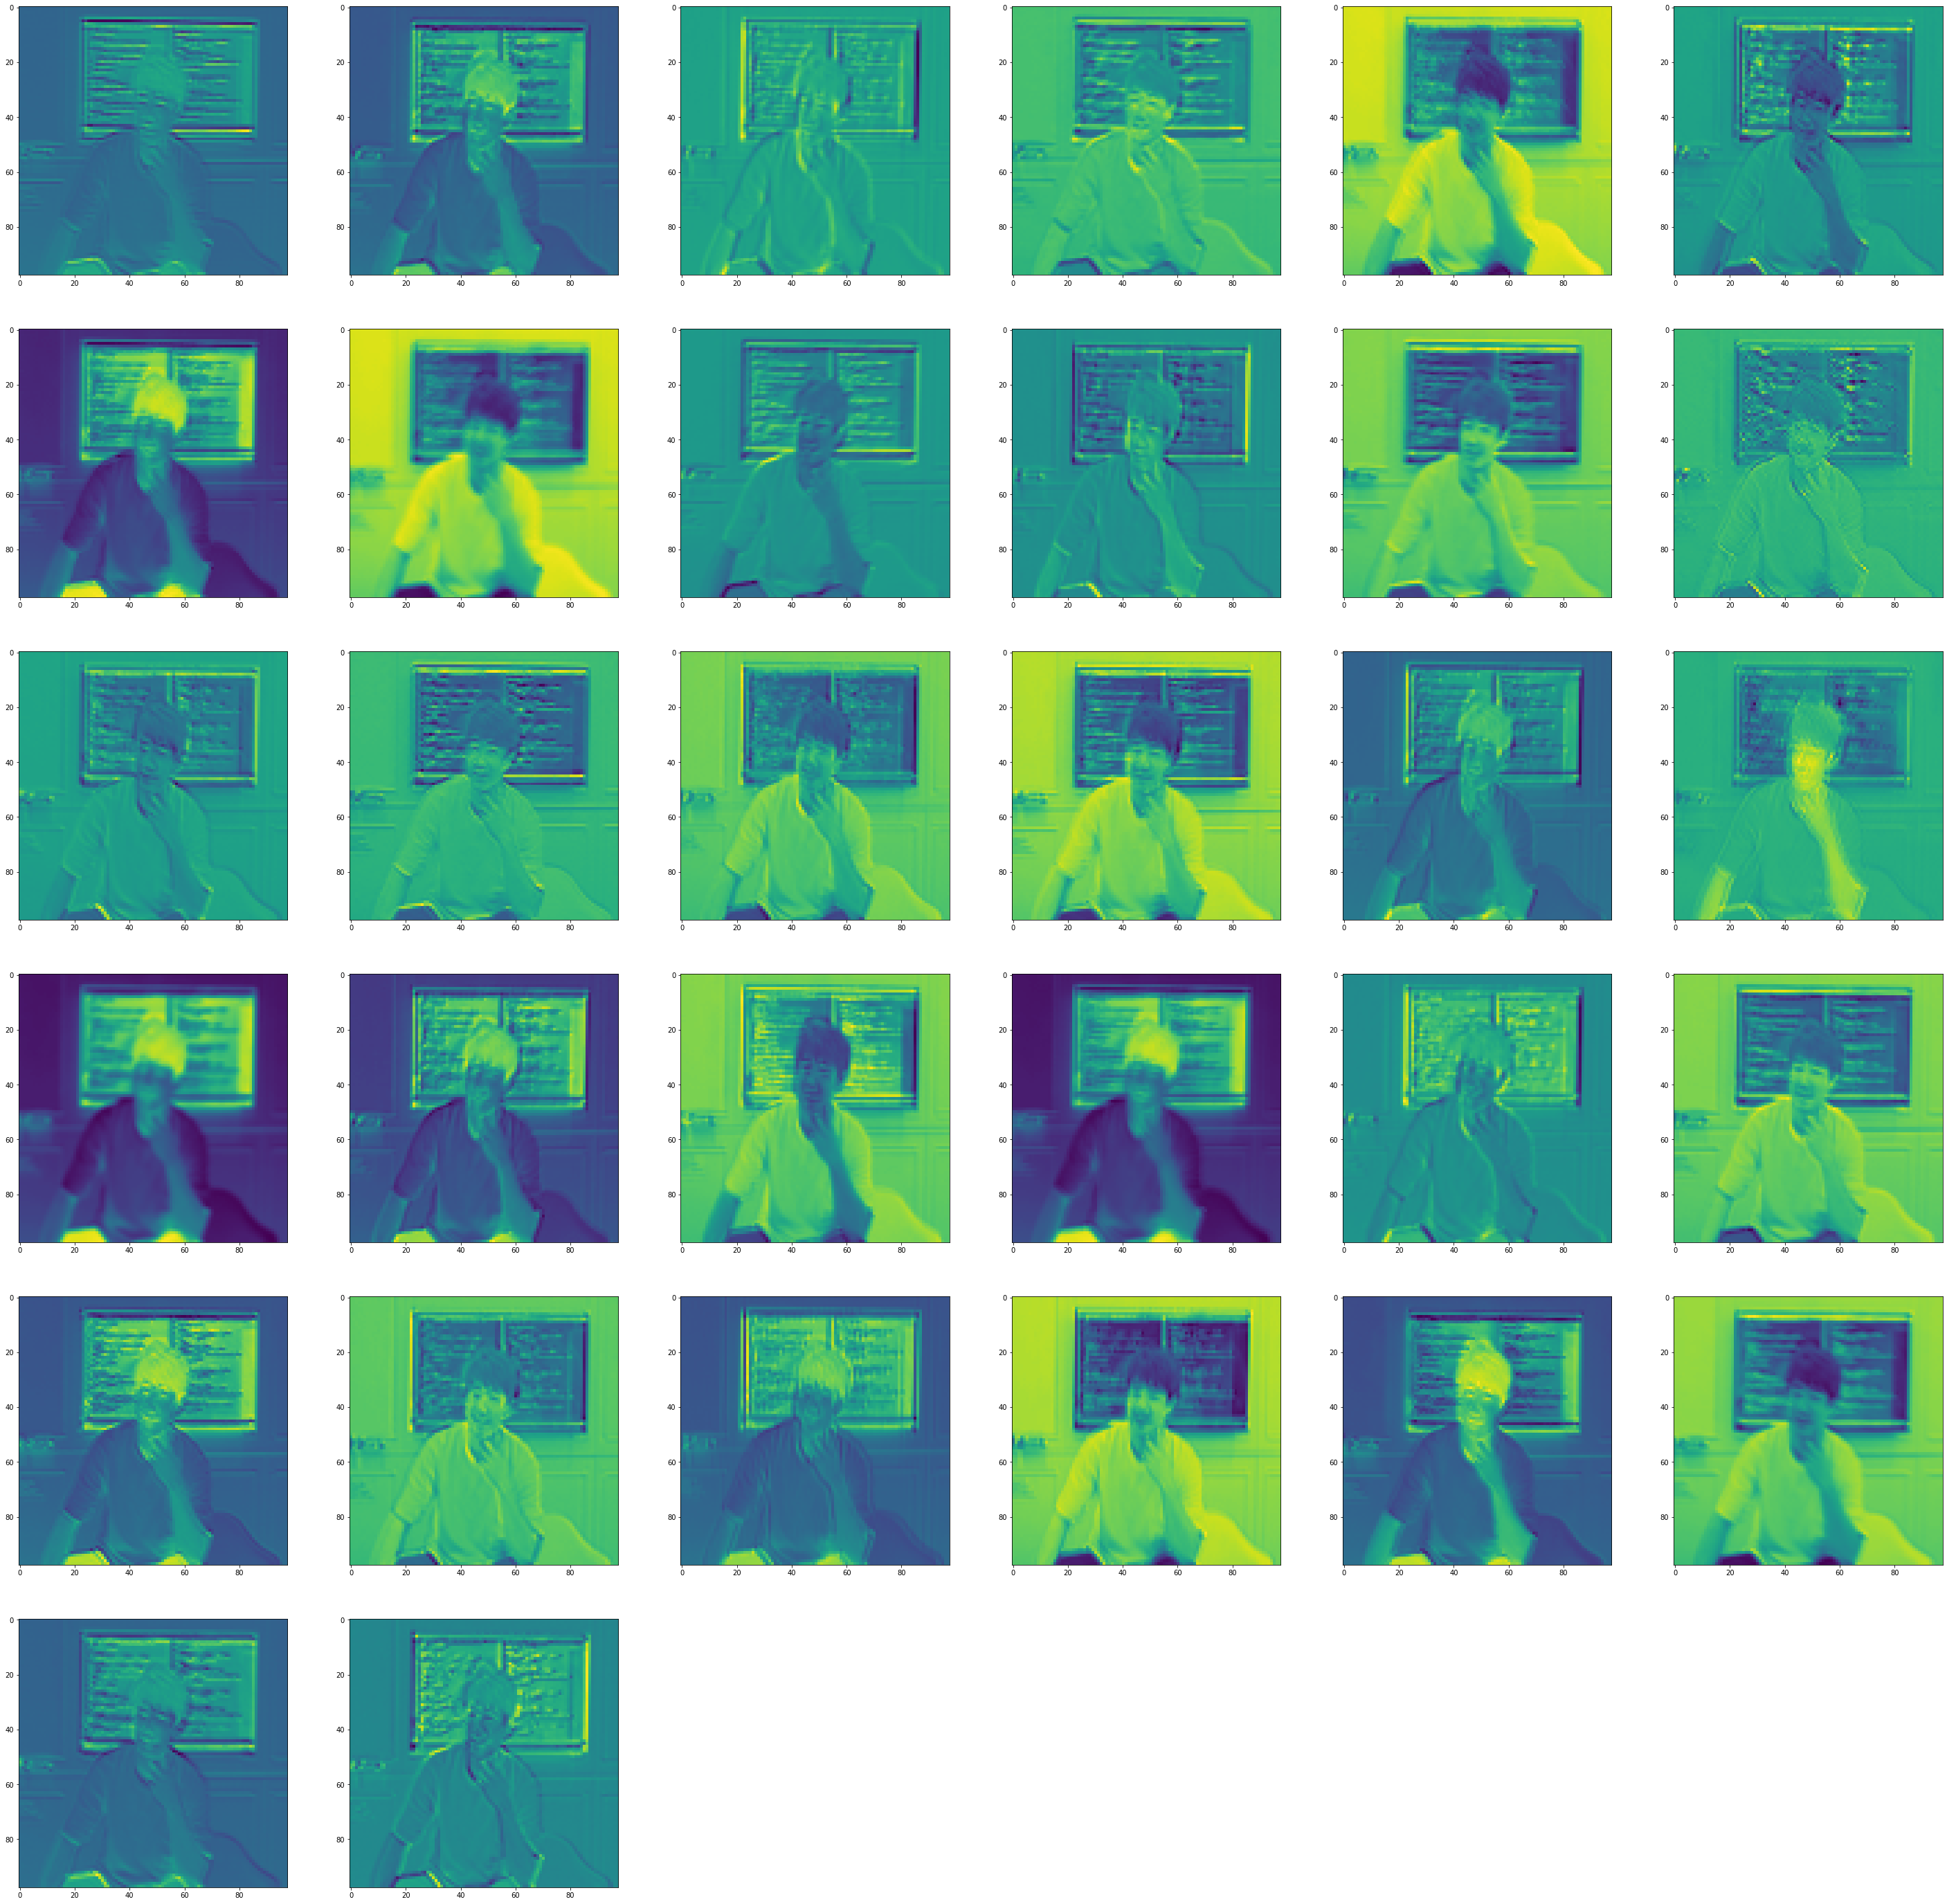

In [ ]:
fig = plt.figure(figsize = (50,50))

for i in range(32):
    ax = fig.add_subplot(6,6, i+1)
    ax.imshow(feature[0, :, :, i])

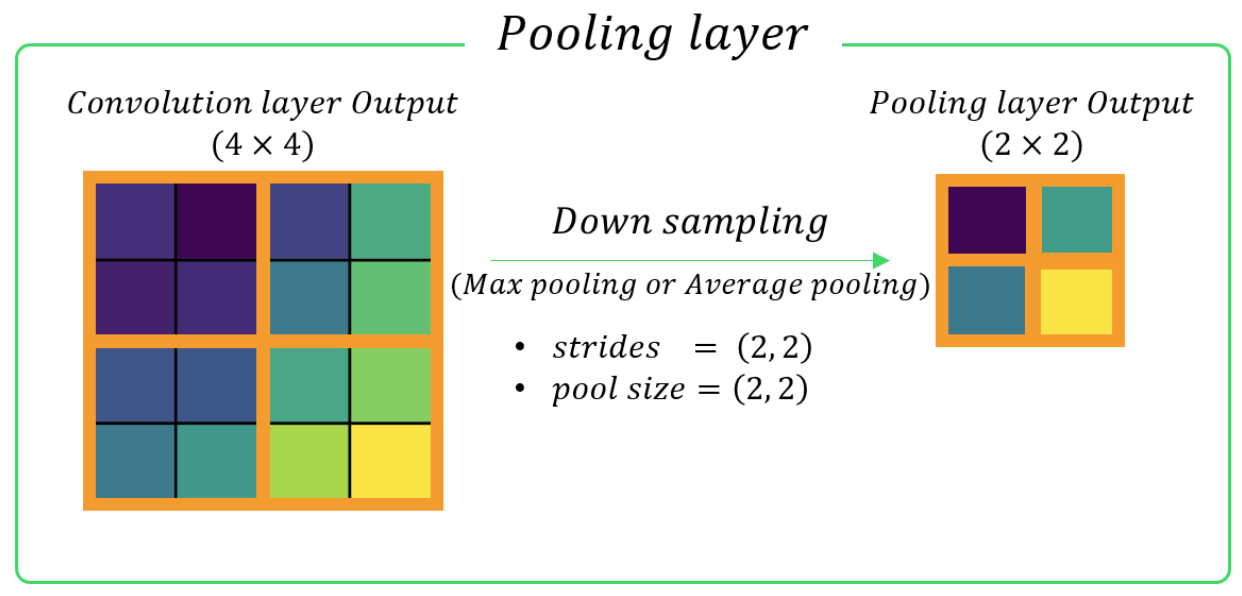

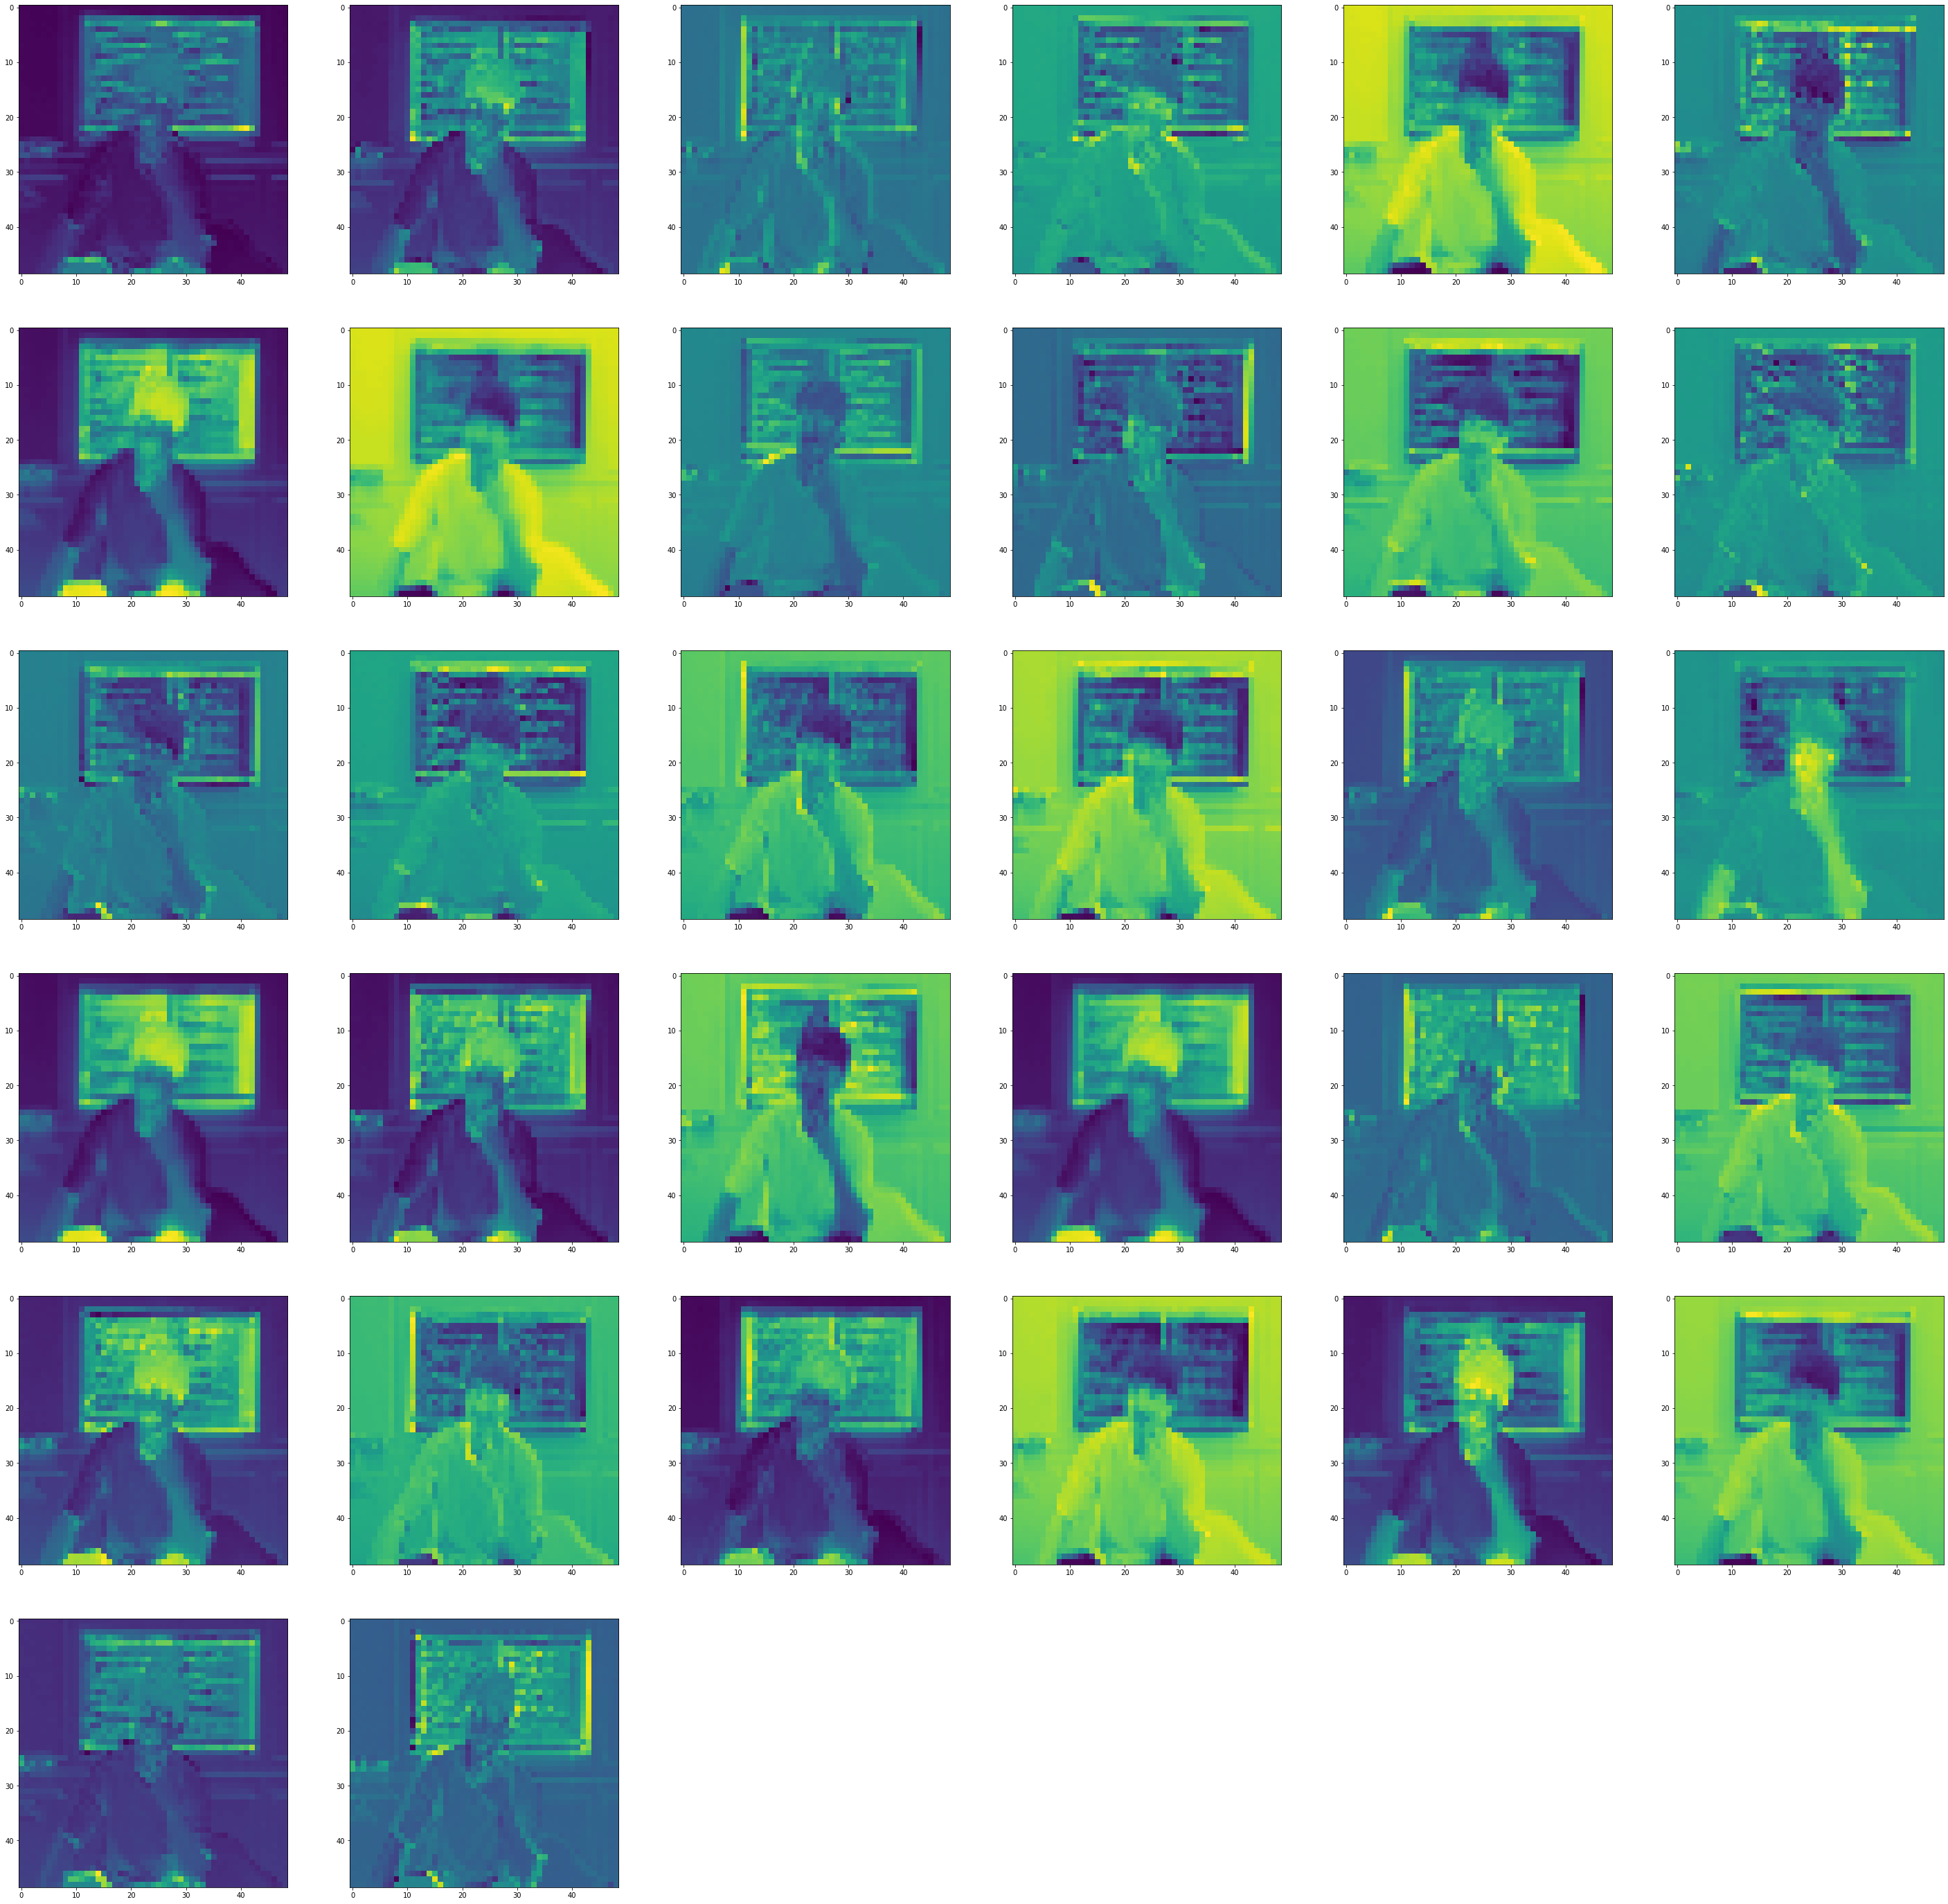

In [ ]:
fig = plt.figure(figsize = (50,50))

for i in range(32):
    ax = fig.add_subplot(6,6, i+1)
    ax.imshow(feature[0, :, :, i])

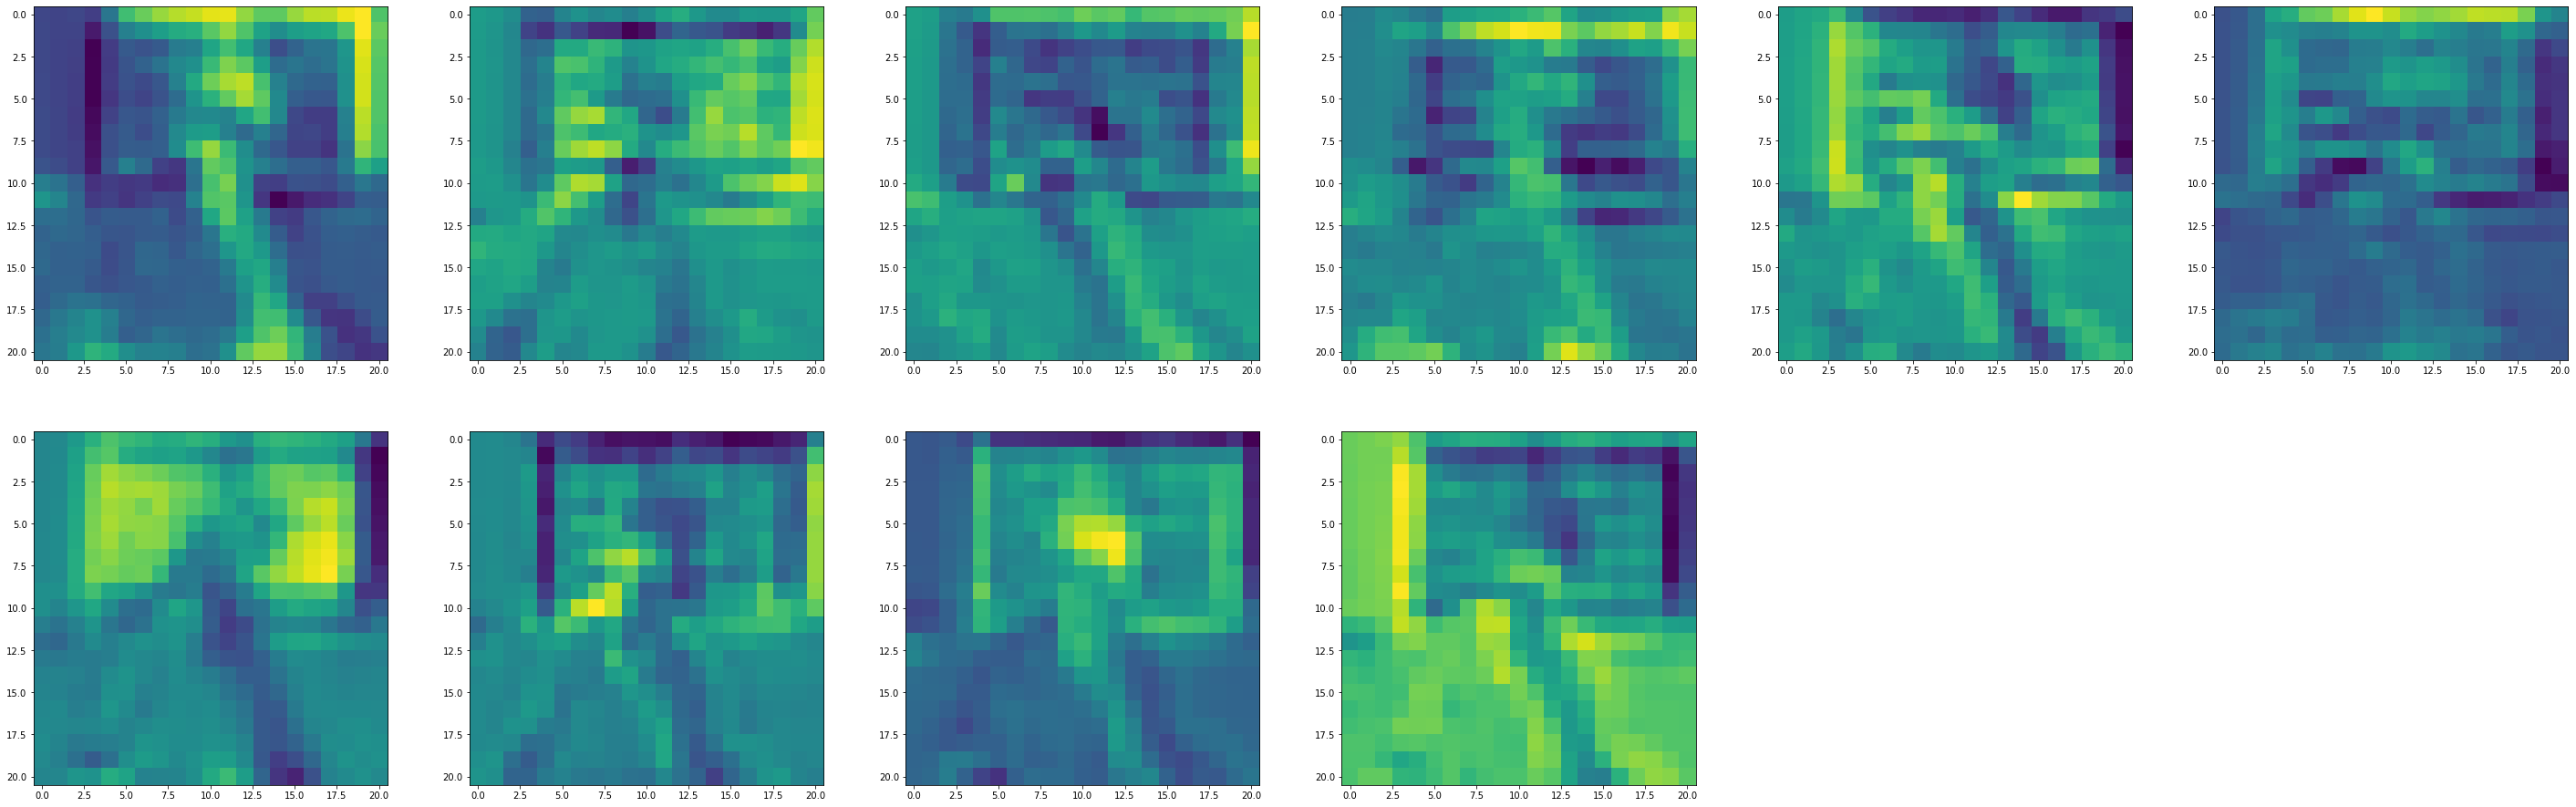

In [ ]:
fig = plt.figure(figsize = (50,50))

for i in range(10):
    ax = fig.add_subplot(6,6, i+1)
    ax.imshow(feature[0, :, :, i])

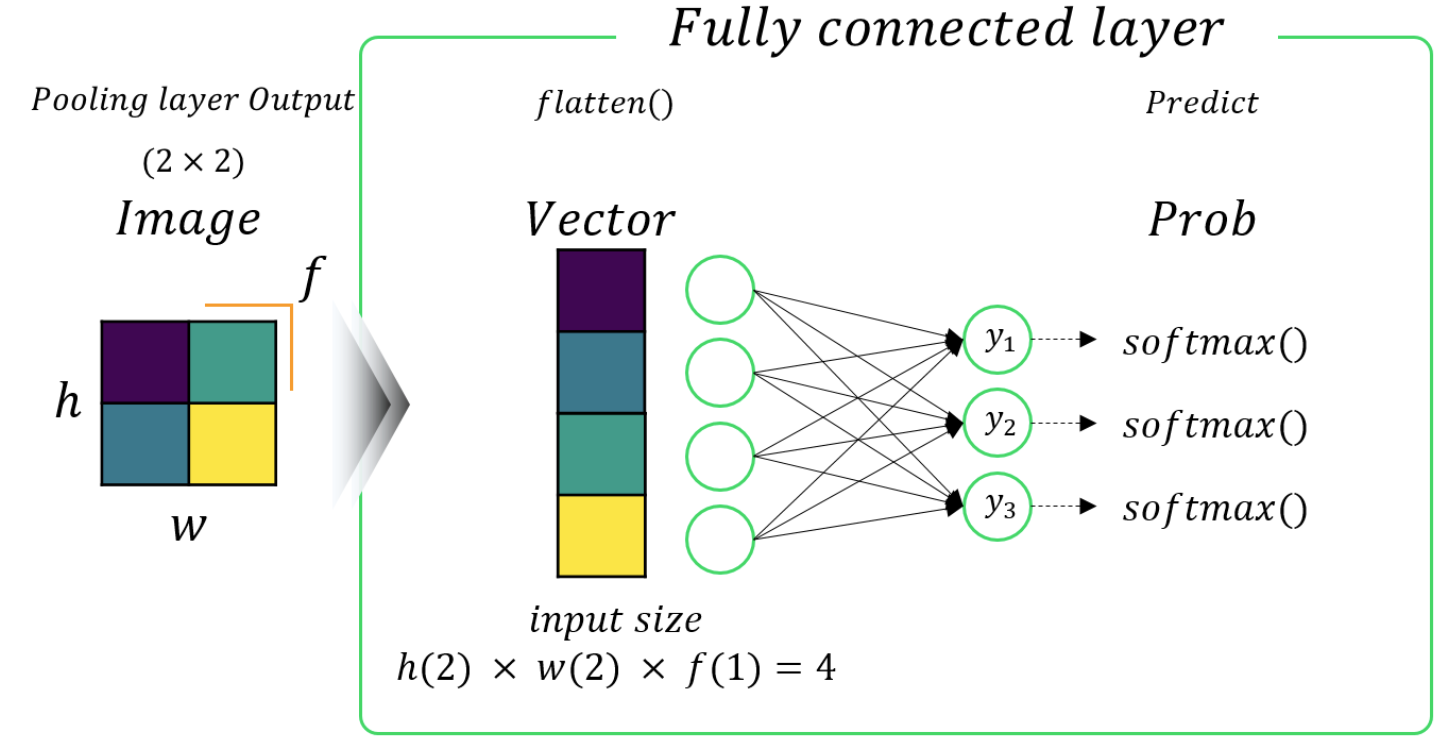

In [ ]:
h = 21
w = 21
f = 128

print(h * w * f)

56448


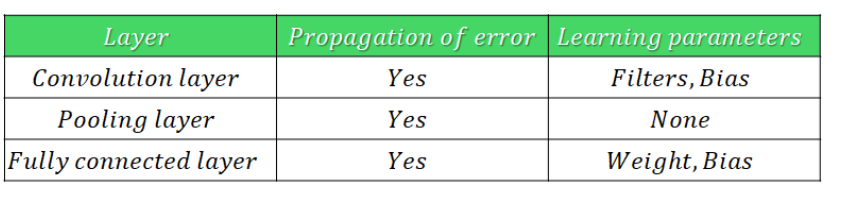